55 右旋字符串（卡码网）
===
字符串的右旋转操作是把字符串尾部的若干个字符转移到字符串的前面。给定一个字符串 s 和一个正整数 k，请编写一个函数，将字符串中的后面 k 个字符移到字符串的前面，实现字符串的右旋转操作。 

例如，对于输入字符串 "abcdefg" 和整数 2，函数应该将其转换为 "fgabcde"

题解
---
- 分两步进行
- 整体反转
- 局部反转
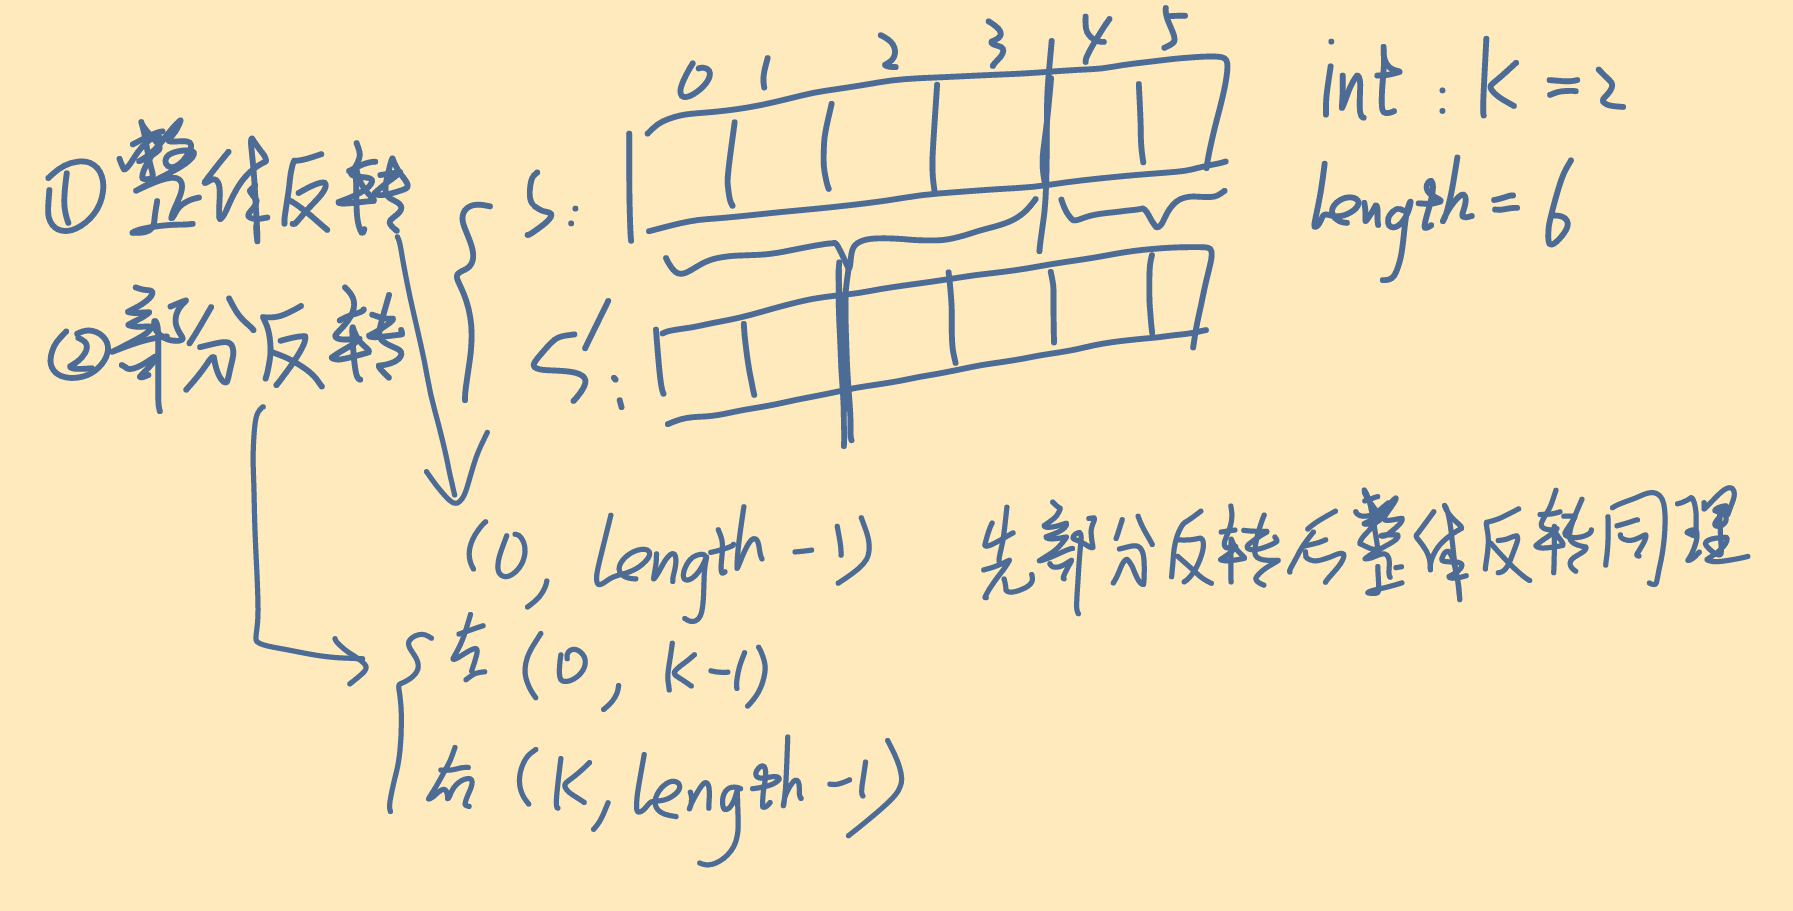

28 找出字符串中第一个匹配项的下标
===
给你两个字符串 haystack 和 needle ，请你在 haystack 字符串中找出 needle 字符串的第一个匹配项的下标（下标从 0 开始）。如果 needle 不是 haystack 的一部分，则返回  -1 。

题解
---
- 可暴力双循环解，以下使用KMP解
- KMP算法实现
- 获取前缀函数值数组next，设模式串数组为s，初始化next[0] = 0;
1. 两个指针i和j分别指向后缀的末尾和前缀的末尾
2. 当s[i] = s[j]时，说明在模式串s中，i之前的元素(包括i)和j之前的元素(包括j)都相等，即前缀与后缀相等
3. 当s[i] != s[j]时，说明前缀与后缀不相等，此时需要回退j到最近相等的位置(即next[j-1])，取这个位置的元素值并记录到前缀函数值数组next的对应位置(next[i])中
- 根据next数组进行模式匹配
1. 遍历字符串的指针无需回退，只需要根据next数组回退指向模式的指针
2. 当字符串和模式匹配时，两个指针同时前移
3. 出现不匹配时，指向模式的指针根据模式中已完成匹配的长度j，获取next[j-1]位置记录的数值，作为重新匹配时模式串能够跳过的长度

代码
---
```
class Solution {
    public int strStr(String haystack, String needle) {
        //获取next数组
        int[] next = new int[needle.length()];
        getNext(needle, next);
        //根据next数组进行匹配
        int j = 0;
        for(int i = 0; i < haystack.length(); i++){
            while(j > 0 && needle.charAt(j) != haystack.charAt(i)){
                //字符串和模式串不匹配
                j = next[j-1];//从next数组获取模式串无需重新匹配的长度
            }
            if(needle.charAt(j) == haystack.charAt(i)){
                j++;
            }
            if(j == needle.length()){
                //因为匹配到模式的最后一个仍然相等时还是会执行j++,因此判断位置时j==needle.length()
                return i - needle.length() + 1;
            }
        }
        return -1;
    }
    private void getNext(String s, int[] next){
        int j = 0;//指向前缀最后一个字符
        next[0] = 0;//第一个字符的前缀函数值置为0
        for(int i = 1; i < s.length(); i++){//从next数组的第二个元素开始赋值
            while(j > 0 && s.charAt(j) != s.charAt(i)){
                //前缀与后缀不同，执行回退
                j = next[j-1];
            }
            if(s.charAt(j) == s.charAt(i)){
                //前缀与后缀相同，继续移动
                j++;
            }
            next[i] = j;
        }
    }
}

```